* # Spark SQL is a Spark module for structured data processing. 
* # There is more migration from HIVE to spark SQL
* # HIVE limitations
  > Lags in performance as it uses MapReduce jobs for executing ad-hoc queries
  > does not allow resume a job processing from middle in case of failure





#SPARK SQL Features
  > is a module for structured data processing
# Interact with spark SQL
  > * dataframe API
  > * dataset API
  > * RDD API
# Highly compatible with SQL based framework like HIVE
# Can work on the data which are stored external in RDBMS outside to the big data  set up.
# files in HDFS
# Easily connect to spark SQL with JDBC or ODBC
# Spark does not has its own storage

In [1]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 29 kB/s              
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 198 kB 56.4 MB/s            
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=c4122a0636b4f52f6a0ebd98f2c90cf501280f0a927df566748c46c20d671cae
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.4
    Uninstalling py4j-0.10.9.4:
      Successfully uninstalled py4j-0.10.9.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark
from pyspark.context import SparkContext 
from pyspark.sql import SparkSession  #Connect spark code on top of spark engine
from pyspark import SparkConf 
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[4]"))

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/12 17:31:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


The architecture contains three layers namely, Language API, Schema RDD, and Data Sources.

Language API − Spark is compatible with different languages and Spark SQL. It is also, supported by these languages- API (python, scala, java, HiveQL).

Schema RDD − Spark Core is designed with special data structure called RDD. Generally, Spark SQL works on schemas, tables, and records. Therefore, we can use the Schema RDD as temporary table. We can call this Schema RDD as Data Frame.

Data Sources − Usually the Data source for spark-core is a text file, Avro file, etc. However, the Data Sources for Spark SQL is different. Those are Parquet file, JSON document, HIVE tables, and Cassandra database.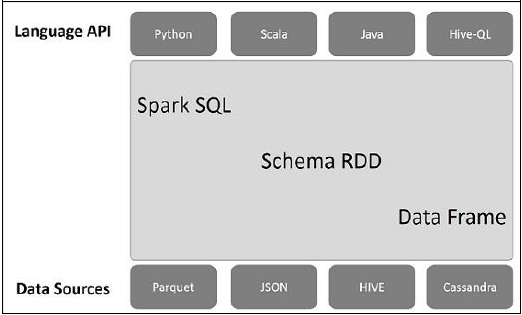

In [3]:
import sys
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# SQLContext similar to SparkContext

In [4]:
sqlContext = SQLContext(sc)
sqlContext

/opt/conda/lib/python3.7/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


# Creating DataFrames
DataFrames can be created from an existing RDD, from a Hive table, or from Spark data sources.

In [5]:
# Define an RDD  
rdd1 = sc.parallelize([Row(name="Manoj Mukund", age=59),
                           Row(name="Hari Kumar", age=65),
                           Row(name="Vivek Ram", age=65),
                           Row(name="Mr. John", age=19)])
rdd1.collect()

[Row(name='Manoj Mukund', age=59),
 Row(name='Hari Kumar', age=65),
 Row(name='Vivek Ram', age=65),
 Row(name='Mr. John', age=19)]

In [6]:
# The DataFrame is a Dataset of Rows in Scala and Java API, In Python, it’s possible to access a DataFrame’s columns either by attribute (df.age) or by indexing (df['age']).
# Infer schema from the first row, create a DataFrame and print the schema
df1 = sqlContext.createDataFrame(rdd1)
df1.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [7]:
# Select only the "name" column
df1.select("name").show()

+------------+
|        name|
+------------+
|Manoj Mukund|
|  Hari Kumar|
|   Vivek Ram|
|    Mr. John|
+------------+



In [8]:
# Select everybody, but increment the age by 1
df1.select(df1['name'], df1['age'] + 1).show()

+------------+---------+
|        name|(age + 1)|
+------------+---------+
|Manoj Mukund|       60|
|  Hari Kumar|       66|
|   Vivek Ram|       66|
|    Mr. John|       20|
+------------+---------+



In [9]:
# Select people older than 55
df1.filter(df1['age'] > 55).show()

+------------+---+
|        name|age|
+------------+---+
|Manoj Mukund| 59|
|  Hari Kumar| 65|
|   Vivek Ram| 65|
+------------+---+



In [10]:
# Count people by age
df1.groupBy("age").count().show()

+---+-----+
|age|count|
+---+-----+
| 59|    1|
| 65|    2|
| 19|    1|
+---+-----+



In [11]:
# A dataframe is an RDD of rows plus information on the schema.
# performing **collect()* on either the RDD or the DataFrame gives the same result.
print(type(rdd1),type(df1))
print('df1_name=',df1.collect())
print('rdd1_name=',rdd1.collect())

<class 'pyspark.rdd.RDD'> <class 'pyspark.sql.dataframe.DataFrame'>
df1_name= [Row(name='Manoj Mukund', age=59), Row(name='Hari Kumar', age=65), Row(name='Vivek Ram', age=65), Row(name='Mr. John', age=19)]
rdd1_name= [Row(name='Manoj Mukund', age=59), Row(name='Hari Kumar', age=65), Row(name='Vivek Ram', age=65), Row(name='Mr. John', age=19)]


In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("pySparkdf").getOrCreate()

In [13]:
spark = SparkSession.builder.appName("pySpark csv df").getOrCreate()

In [14]:
df = spark.read.csv("../input/housedata/data.csv")
print(type(df))
df.show(5)

<class 'pyspark.sql.dataframe.DataFrame'>
+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+-------+
|                _c0|      _c1|     _c2|      _c3|        _c4|     _c5|   _c6|       _c7| _c8|      _c9|      _c10|         _c11|    _c12|        _c13|                _c14|     _c15|    _c16|   _c17|
+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+-------+
|               date|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|sqft_above|sqft_basement|yr_built|yr_renovated|              street|     city|statezip|country|
|2014-05-02 00:00:00| 313000.0|     3.0|      1.5|       1340|    7912|   1.5|         0|   0|        3|      1340|            0|    1955|        2005|18810 D

In [15]:
df = spark.read.csv(header=True, inferSchema= True, path= "../input/housedata/data.csv")

df.printSchema()

df.show(5)

root
 |-- date: string (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- statezip: string (nullable = true)
 |-- country: string (nullable = true)

+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+-------+
|               date|    price|bedrooms|bathrooms|sqft_living|sqft_

# Count total records

In [16]:
total_records = df.count()
print("Total records:" + str(total_records))

Total records:4600


# Running SQL Queries Programmatically

In [17]:
# Register the DataFrame as a SQL temporary view
df1.createOrReplaceTempView("dfAsView")

sqlDF1 = spark.sql("SELECT * FROM dfAsView")
sqlDF1.show()

+------------+---+
|        name|age|
+------------+---+
|Manoj Mukund| 59|
|  Hari Kumar| 65|
|   Vivek Ram| 65|
|    Mr. John| 19|
+------------+---+



# Defining a Schema explicitly

In [18]:
# In this case we create the dataframe from an RDD of tuples (rather than Rows) and provide the schema explicitly
rdd2 = sc.parallelize([("Manoj ", 59), ("Hari ", 65), ("Vivek ", 65), ("John ", 19)])
# Schema with two fields - person_name and person_age
schema = StructType([StructField("person_name", StringType(), False),
                     StructField("person_age", IntegerType(), False)])

# Create a DataFrame by applying the schema to the RDD and print the schema
df2 = sqlContext.createDataFrame(rdd2, schema)
df2.printSchema()


root
 |-- person_name: string (nullable = false)
 |-- person_age: integer (nullable = false)



# Inferring the Schema Using Reflection
  > Spark SQL can convert an RDD of Row objects to a DataFrame, inferring the datatypes. 
  > Rows are constructed by passing a list of key/value pairs as kwargs to the Row class. 

In [19]:
from pyspark.sql import Row
sc = spark.sparkContext

# Load a text file and convert each line to a Row.
lines = sc.textFile("../input/people/people.txt")
parts = lines.map(lambda l: l.split(","))
people = parts.map(lambda p: Row(name=p[0], age=int(p[1])))

# Infer the schema, and register the DataFrame as a table.
schemaPeople = spark.createDataFrame(people)
schemaPeople.createOrReplaceTempView("people")

# SQL can be run over DataFrames that have been registered as a table.
teenagers = spark.sql("SELECT name FROM people WHERE age >= 13 AND age <= 19")

# The results of SQL queries are Dataframe objects.
# rdd returns the content as an :class:`pyspark.RDD` of :class:`Row`.
teenNames = teenagers.rdd.map(lambda p: "Name: " + p.name).collect()
for name in teenNames: print(name)
# Name: Justin

Name: Justin
